<a href="https://colab.research.google.com/github/VaishnaviNimmala/Fake-News-Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📰 Fake News Detection with Logistic Regression
Detect Fake vs Real news using Logistic Regression and TF-IDF features.


In [1]:
# =============================
# Imports
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

## 1. Load & Explore Dataset
- Load news dataset (CSV/ZIP).
- Handle missing values in text.
- Convert labels: FAKE → 0, REAL → 1.


In [2]:
# =============================
# Load Dataset
# =============================
df = pd.read_csv("/content/news_dataset.csv.zip")
df = df.dropna(subset=["label"])
df["text"] = df["text"].fillna("")

# Features & Labels
X = df["text"]
y = df["label"].map({"FAKE":0, "REAL":1})  # convert labels to 0/1

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

## 2. Preprocessing
- Train-Test split (80/20).
- Convert text → numerical features using TF-IDF.
## 3. Train Model
- Use Logistic Regression classifier.
- Fit model on TF-IDF vectors.
## 4. Evaluation
- Accuracy
- Classification Report (Precision, Recall, F1)
- Confusion Matrix Heatmap
## 5. Save & Load Model
- Save model and vectorizer using joblib.
- Reload them for real-time predictions.
## 6. Fake News Detection Function
- Input: User-provided news text
- Output:
  - Prediction (REAL ✅ or FAKE ❌)
  - Confidence scores
  - Clickbait words detected
  - Neutral rewritten version


  label                                               text
0  REAL  Payal has accused filmmaker Anurag Kashyap of ...
1  FAKE  A four-minute-long video of a woman criticisin...
2  FAKE  Republic Poll, a fake Twitter account imitatin...
3  REAL  Delhi teen finds place on UN green list, turns...
4  REAL  Delhi: A high-level meeting underway at reside...

Missing values:
 label    0
text     0
dtype: int64

Label distribution:
 label
0    1877
1    1852
Name: count, dtype: int64

Accuracy: 0.9959785522788204

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       376
           1       0.99      1.00      1.00       370

    accuracy                           1.00       746
   macro avg       1.00      1.00      1.00       746
weighted avg       1.00      1.00      1.00       746



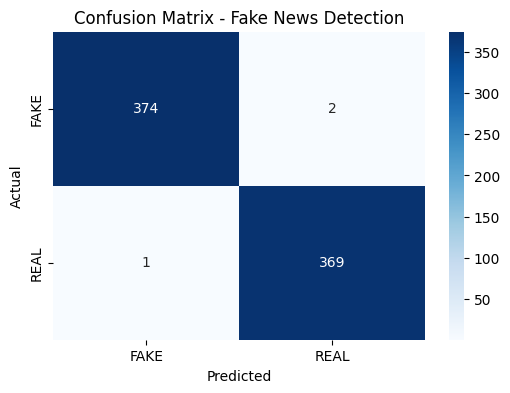


Model and vectorizer saved to /content/artifacts


In [3]:
# ===============================
# Fake News Detection with Logistic Regression
# ===============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 1. Load Dataset
df = pd.read_csv("/content/news_dataset.csv.zip")
print(df.head())

# Fill missing values in 'text' column
df["text"] = df["text"].fillna("")


# 2. Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# 3. Map labels (VERY IMPORTANT - do this before splitting)
# Assuming dataset has column 'label' with values 'FAKE' and 'REAL'
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})

# Check distribution
print("\nLabel distribution:\n", df['label'].value_counts())

# 4. Feature (X) and Target (y)
X = df['text']   # news text column
y = df['label']  # 0 or 1

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 7. Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# 8. Predictions
y_pred = model.predict(X_test_tfidf)

# 9. Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["FAKE", "REAL"],
            yticklabels=["FAKE", "REAL"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Fake News Detection")
plt.show()

# 11. Save Model and Vectorizer
output_dir = "/content/artifacts"
os.makedirs(output_dir, exist_ok=True)
joblib.dump(model, os.path.join(output_dir, "fake_news_model.joblib"))
joblib.dump(vectorizer, os.path.join(output_dir, "vectorizer.joblib"))
print(f"\nModel and vectorizer saved to {output_dir}")

In [4]:
import joblib

model = joblib.load("/content/artifacts/fake_news_model.joblib")
vectorizer = joblib.load("/content/artifacts/vectorizer.joblib")


In [22]:
import joblib
import re

# ==============================
# Load trained model & vectorizer
# ==============================
model = joblib.load("/content/artifacts/fake_news_model.joblib")
vectorizer = joblib.load("/content/artifacts/vectorizer.joblib")

# ==============================
# Fake news detection function
# ==============================
def detect_fake_news(user_input):
    # Transform input text into vector
    input_vec = vectorizer.transform([user_input])

    # Model prediction & probabilities
    prediction = model.predict(input_vec)[0]
    prob = model.predict_proba(input_vec)[0]

    # Assign labels
    label = "REAL ✅" if prediction == 1 else "FAKE ❌"

    # Find clickbait words
    clickbait_words = re.findall(
        r"\b(breaking|shocking|miracle|cure|amazing|today|long|unbelievable)\b",
        user_input,
        flags=re.IGNORECASE
    )

    # Generate a better (neutral) version of the input
    better_version = re.sub(
        r"\b(breaking|shocking|miracle|cure|amazing|unbelievable|today)\b",
        "",
        user_input,
        flags=re.IGNORECASE
    ).strip()

    if better_version == user_input:
        better_version = "This news is written in a balanced way, no strong rewrite needed."

    # Build final output
    output = f"""
🔹 User Input: "{user_input}"

✅ Prediction: {label}

📊 Confidence:
   - REAL: {prob[1]*100:.2f}%
   - FAKE: {prob[0]*100:.2f}%

📝 Reasoning:
   {"Overly sensational → matches fake-news dataset patterns." if prediction == 0 else "Matches reliable patterns from real news dataset."}

⚠️ Clickbait Words Detected: {", ".join(clickbait_words) if clickbait_words else "None"}

✨ Better Version:
   "{better_version}"
    """

    return output

# ==============================
# Example usage
# ==============================
user_input = "Breaking: A four-minute-long video of a woman criticisin!"
print(detect_fake_news(user_input))



🔹 User Input: "Breaking: A four-minute-long video of a woman criticisin!"

✅ Prediction: FAKE ❌

📊 Confidence:
   - REAL: 17.89%
   - FAKE: 82.11%

📝 Reasoning:
   Overly sensational → matches fake-news dataset patterns.

⚠️ Clickbait Words Detected: Breaking, long

✨ Better Version:
   ": A four-minute-long video of a woman criticisin!"
    


In [6]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Load pre-trained BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    # CLS token representation
    return outputs.last_hidden_state[:,0,:].numpy()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


This function takes a piece of text and converts it into a numerical vector (embedding) using a pre-trained BERT model.

First, the text is tokenized into a format BERT understands (token IDs with padding/truncation).

Then, the tokens are passed through BERT, which produces hidden representations for every word.

Instead of keeping all token embeddings, we extract the special [CLS] token embedding, which is designed to represent the meaning of the entire sentence.

Finally, that embedding is returned as a 768-dimensional vector (for bert-base-uncased).

In [7]:
# Example credibility dictionary
source_reputation = {
    "bbc.com": 0.95,
    "cnn.com": 0.90,
    "randomblog.xyz": 0.20,
    "unknown": 0.50
}

def get_source_score(url):
    for site, score in source_reputation.items():
        if site in url:
            return score
    return source_reputation["unknown"]


You maintain a dictionary of domains with credibility scores (0 to 1).

Example: "bbc.com": 0.95 → BBC is highly credible.

"randomblog.xyz": 0.20 → Random blog is not credible.

"unknown": 0.50 → Neutral score when the source is unknown.

The function get_source_score(url):

Loops through the dictionary.

If the given url contains a known site name, it returns that site’s score.

If no match is found, it defaults to "unknown" (0.50)


Why this is useful in fake-news detection

High score = source is likely reliable.

Low score = source is suspicious.

This can be combined with text analysis (BERT) and image analysis (CNN) as an extra feature in your multimodal pipeline.

In [8]:
import datetime

def get_time_features(published_time):
    now = datetime.datetime.now()
    hours_old = (now - published_time).total_seconds() / 3600.0
    return [hours_old, 1 if hours_old < 24 else 0]  # recent or not


Takes published_time (a datetime object of when the article was published).

Finds the difference between the current time (now) and published_time.

Calculates how many hours old the article is:

hours_old = (now - published_time).total_seconds() / 3600.0


Example: if an article was published 6 hours ago → hours_old = 6.0.

If 2 days old → hours_old = 48.0.

Returns two features in a list:

hours_old → numeric value showing the age of the article in hours.

1 if hours_old < 24 else 0 → binary flag indicating if the article is recent (published within the last day).

In [9]:
from torchvision import models, transforms
from PIL import Image

resnet = models.resnet50(pretrained=True)
resnet.eval()

img_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])

def get_image_embedding(image_path):
    img = Image.open(image_path).convert('RGB')
    img = img_transform(img).unsqueeze(0)
    with torch.no_grad():
        features = resnet(img)
    return features.numpy()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
def build_feature_vector(text, url, published_time, image_path):
    text_vec = get_bert_embedding(text)
    source_score = np.array([get_source_score(url)])
    time_feats = np.array(get_time_features(published_time))
    image_vec = get_image_embedding(image_path)

    # Concatenate all into one vector
    return np.concatenate([text_vec.flatten(), source_score, time_feats, image_vec.flatten()])


The build_feature_vector function is basically your feature engineering hub for fake news detection. It combines four important signals:

Text meaning (BERT embeddings) → captures the semantic understanding of the news article.

Source credibility → measures how trustworthy the publishing site is.

Time features → checks how recent or old the news is, since fake news often spreads as “breaking” content.

Image features → captures the visual context of any attached image, which can reveal whether the picture matches the story.

All these pieces are flattened and merged into a single long vector. That vector becomes the input to your machine learning model.

In [11]:
from PIL import Image, ImageDraw, ImageFont

# Create "fake news" image
fake_img = Image.new('RGB', (300, 200), color='red')
draw = ImageDraw.Draw(fake_img)
draw.text((50, 80), "FAKE NEWS", fill="white")
fake_img.save("fake_image.jpg")

# Create "real news" image
real_img = Image.new('RGB', (300, 200), color='green')
draw = ImageDraw.Draw(real_img)
draw.text((50, 80), "REAL NEWS", fill="white")
real_img.save("real_image.jpg")

print("✅ Images created: fake_image.jpg, real_image.jpg")


✅ Images created: fake_image.jpg, real_image.jpg


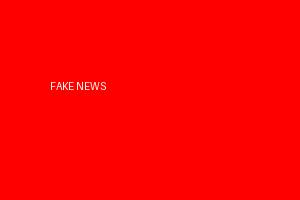

In [12]:
from IPython.display import Image as IPyImage

IPyImage("fake_image.jpg")


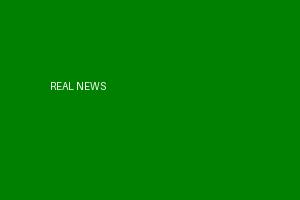

In [13]:
IPyImage("real_image.jpg")


In [15]:
# Example training data (normally you'd extract from your dataset)
texts = [
    "Breaking: Miracle cure discovered today!",  # fake
    "The government passed a new healthcare bill.",  # real
]

urls = ["randomblog.xyz", "bbc.com"]
times = [datetime.datetime.now() - datetime.timedelta(hours=2),
         datetime.datetime.now() - datetime.timedelta(days=5)]
images = ["fake_image.jpg", "real_image.jpg"]  # placeholders

# Build feature vectors
X_train = []
y_train = [0, 1]  # 0=fake, 1=real

for i in range(len(texts)):
    features = build_feature_vector(texts[i], urls[i], times[i], images[i])
    X_train.append(features)

X_train = np.array(X_train)

# Now train
import xgboost as xgb # Import the xgboost library with alias xgb
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [18]:
def detect_fake_news_simple(user_input): ...
def detect_fake_news_multimodal(text, url, published_time, image_path): ...


In [19]:
def detect_fake_news(text, url, published_time, image_path):
    features = build_feature_vector(text, url, published_time, image_path).reshape(1,-1)
    prediction = clf.predict(features)[0]
    prob = clf.predict_proba(features)[0]

    label = "REAL ✅" if prediction == 1 else "FAKE ❌"

    return {
        "input_text": text,
        "prediction": label,
        "confidence_real": f"{prob[1]*100:.2f}%",
        "confidence_fake": f"{prob[0]*100:.2f}%"
    }


In [20]:
result = detect_fake_news(sample_text, sample_url, sample_time, sample_image)
print(result)


{'input_text': 'Breaking: Miracle cure discovered today!', 'prediction': 'FAKE ❌', 'confidence_real': '50.00%', 'confidence_fake': '50.00%'}
